In [ ]:
# Importing modules 
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf

from keras.utils import to_categorical
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Activation,Dense,Flatten
from keras.models import Sequential

from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
from keras.layers import Conv2D,MaxPooling2D,BatchNormalization,Activation,Dense,Flatten
from keras.models import Sequential

from sklearn.model_selection import train_test_split

import seaborn as sn
import numpy as np

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, RocCurveDisplay

from sklearn import metrics

np.random.seed(1)

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
train_images = []       
train_labels = []
shape = (224,224)  
train_path = '/content/drive/Shareddrives/ECE 539/train'

for filename in os.listdir(train_path):
    if filename.split('.')[1] == 'jpg':
        imgResize = cv2.imread(os.path.join(train_path,filename))
        imgRotate = cv2.imread(os.path.join(train_path,filename))
        
        # Spliting file names and storing the labels for image in list
        train_labels.append(filename.split('_')[0])
        # train_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        imgResize = cv2.resize(imgResize,shape)

        # Rotate all images
        # imgRotate = cv2.resize(imgResize,shape)
        # imgRotate = cv2.rotate(imgRotate, cv2.ROTATE_90_CLOCKWISE)
        
        # train_images.append(imgRotate)
        train_images.append(imgResize)
        
train_labels = pd.get_dummies(train_labels).values

# Converting train_images to array
train_images = np.array(train_images)


# Splitting Training data into train and validation dataset
X_train,X_val,y_train,y_val = train_test_split(train_images,train_labels,random_state=1)

In [ ]:
test_images = []
test_labels = []
shape = (224,224)
test_path = "/content/drive/Shareddrives/ECE 539/test"

for filename in os.listdir(test_path):
    if filename.split('.')[1] == 'jpg':
        img = cv2.imread(os.path.join(test_path,filename))
        
        # Spliting file names and storing the labels for image in list
        test_labels.append(filename.split('_')[0])
        
        # Resize all images to a specific shape
        img = cv2.resize(img,shape)
        
        test_images.append(img)
        
# Converting test_images to array
X_test = np.array(test_images)
y_test = pd.get_dummies(test_labels).values

In [ ]:
print('Train: X=%s, y=%s' % (X_train.shape, y_train.shape))
print('Val  : X=%s, y=%s' % (X_val.shape, y_val.shape))
print('Test : X=%s, y=%s' % (X_test.shape, y_test.shape))

Train: X=(180, 224, 224, 3), y=(180, 4)
Val  : X=(60, 224, 224, 3), y=(60, 4)
Test : X=(60, 224, 224, 3), y=(60, 4)


In [ ]:
net = Sequential()
net.add(Conv2D(32, (3, 3), padding='same', input_shape=(224, 224, 3)))
net.add(BatchNormalization())
net.add(Activation('relu'))

net.add(MaxPooling2D((2, 2),strides=2))

net.add(Conv2D(30, (3, 3), padding='same'))
net.add(BatchNormalization())
net.add(Activation('relu'))

net.add(MaxPooling2D((2, 2),strides=2))

net.add(Conv2D(30, (3, 3), padding='same'))
net.add(BatchNormalization())
net.add(Activation('relu'))

net.add(Flatten())

net.add(Dense(20,activation='relu'))
net.add(Dense(15,activation='relu'))
net.add(Dense(4,activation = 'softmax'))

In [ ]:
# Creating a Sequential model
# net= Sequential()
# net.add(Conv2D(kernel_size=(3,3), filters=32, activation='relu', input_shape=(200,200,3,)))
# net.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
# net.add(MaxPooling2D(2,2))
# net.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))
# net.add(MaxPooling2D(2,2))
# net.add(Conv2D(filters=30,kernel_size = (3,3),activation='relu'))

# net.add(Flatten())

# net.add(Dense(20,activation='relu'))
# net.add(Dense(15,activation='relu'))
# net.add(Dense(4,activation = 'softmax'))

# # net.compile(
# #               loss='categorical_crossentropy', 
# #               metrics=['acc'],
# #               optimizer='adam'
# #              )


In [ ]:
net.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      896       
                                                                 
 batch_normalization (BatchN  (None, 224, 224, 32)     128       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 224, 224, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 30)      8670      
                                                                 
 batch_normalization_1 (Batc  (None, 112, 112, 30)     1

In [ ]:
# history = net.fit(X_train,y_train,epochs=50,batch_size=50,validation_data=(X_val,y_val))

In [ ]:
# # Hyperparameters
# lr = 0.1
# mom = 0.9 
ep = 50
bs = 50

In [ ]:
# # compile and fit the keras model
from tensorflow.keras.optimizers import Adam
# # opt = SGD(learning_rate=lr, momentum=mom)
adam = Adam(learning_rate=0.001)
net.compile(loss='categorical_crossentropy', metrics=['accuracy'],optimizer='adam')


# insert model check point call back
checkpoint_filepath = 'tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)
# Model weights are saved at the end of every epoch, if it's the best seen
# so far.
history = net.fit(X_train, y_train, epochs=ep, batch_size=bs, validation_data=(X_val,y_val) , verbose=1, callbacks=[model_checkpoint_callback])
# The model weights (that are considered the best) are loaded into the model.
net.load_weights(checkpoint_filepath)

Epoch 1/50
4/4 [==============================] - 10s 350ms/step - loss: 4.1186 - accuracy: 0.2944 - val_loss: 64.0747 - val_accuracy: 0.3000
Epoch 2/50
4/4 [==============================] - 0s 119ms/step - loss: 3.0217 - accuracy: 0.4889 - val_loss: 10.9411 - val_accuracy: 0.5167
Epoch 3/50
4/4 [==============================] - 0s 78ms/step - loss: 1.4598 - accuracy: 0.6222 - val_loss: 29.3187 - val_accuracy: 0.3167
Epoch 4/50
4/4 [==============================] - 0s 77ms/step - loss: 1.1999 - accuracy: 0.6944 - val_loss: 42.6623 - val_accuracy: 0.3000
Epoch 5/50
4/4 [==============================] - 0s 88ms/step - loss: 0.7223 - accuracy: 0.7278 - val_loss: 23.6719 - val_accuracy: 0.3000
Epoch 6/50
4/4 [==============================] - 0s 78ms/step - loss: 0.5277 - accuracy: 0.7611 - val_loss: 14.9741 - val_accuracy: 0.4500
Epoch 7/50
4/4 [==============================] - 0s 78ms/step - loss: 0.4512 - accuracy: 0.7667 - val_loss: 14.4833 - val_accuracy: 0.4833
Epoch 8/50
4/4 [=

In [ ]:
# You can visualize the results with a confusion matrix.
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
def plot_confusion_matrix(y_classified, y_true):
  # Compute confusion matrix
    c_mat = np.zeros((y_test.shape[1],y_test.shape[1]))
    for i in range(len(y_true)):
        c_mat[y_classified[i], y_true[i] ] += 1

    group_counts = ["{0:0.0f}".format(value) for value in c_mat.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in c_mat.flatten()/np.sum(c_mat)]
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts, group_percentages)]
    labels = np.asarray(labels).reshape(c_mat.shape[0], c_mat.shape[1])

    plt.figure(figsize=(12,10))
    sn.heatmap(c_mat, annot=labels, fmt='', cmap='rocket_r')
    plt.title("Confusion Matrix")
    plt.ylabel('Output Class')
    plt.xlabel('Target Class')

2/2 [==============================] - 0s 184ms/step - loss: 2.0402 - accuracy: 0.8000
Test loss: 2.0401837825775146
Test accuracy: 0.800000011920929
2/2 [==============================] - 0s 13ms/step
Confusion matrix: 
 [[16  0  0  3]
 [ 1 12  0  5]
 [ 0  1  2  2]
 [ 0  0  0 18]]


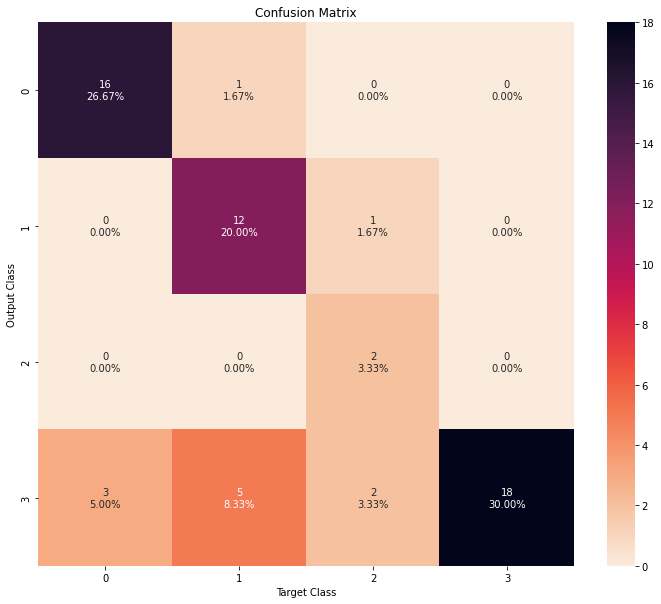

In [ ]:
# Evaluate the trained model using keras built-in function
score = net.evaluate(X_test, y_test, verbose=1)
print("Test loss:", score[0])
print("Test accuracy:", score[1]) 

y_classified = np.argmax(net.predict(X_test), axis=1)
y_true =  np.argmax(y_test, axis=1)
# Compute the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion matrix: \n", confusion_matrix(y_true, y_classified))

# plot confusion matrix
plot_confusion_matrix(y_classified, y_true)

In [ ]:
# Compute the confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
print("Confusion matrix: \n", confusion_matrix(y_true, y_classified))
print("P(classification) =", np.round(accuracy_score(y_true, y_classified), 3))

Confusion matrix: 
 [[16  0  0  3]
 [ 1 12  0  5]
 [ 0  1  2  2]
 [ 0  0  0 18]]
P(classification) = 0.8


In [ ]:
metrics.matthews_corrcoef(y_true, y_classified, sample_weight=None)

0.7360494823181898

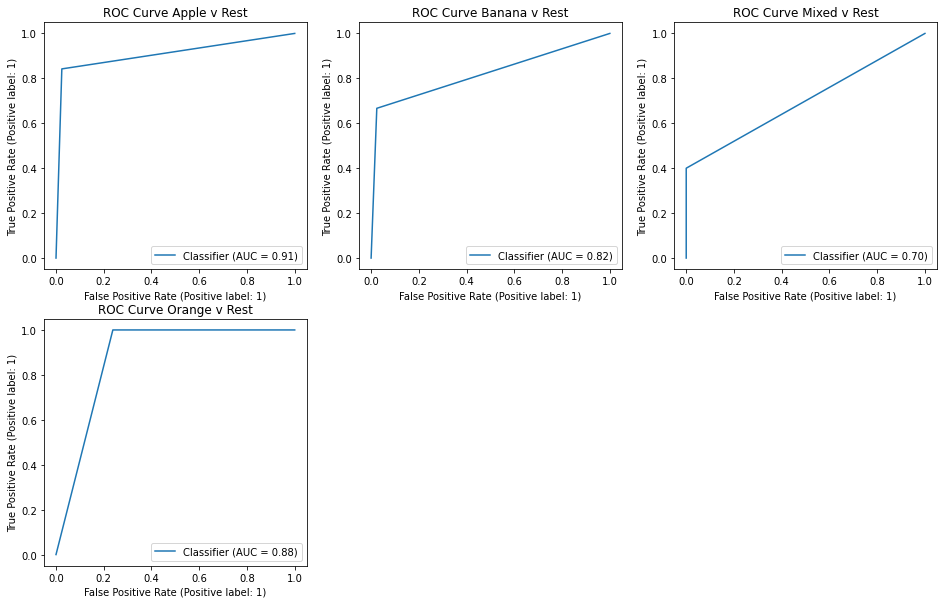

In [ ]:
plt.figure(figsize = (16, 10))
classes = ['Apple', 'Banana', 'Mixed', 'Orange']

for i in range(len(classes)):
    y_true_sub = np.array([int(y == i) for y in y_true])
    y_class_sub = np.array([int(y == i) for y in y_classified])
    
    roc_auc = metrics.roc_auc_score(y_true_sub,y_class_sub)

    ax = plt.subplot(2, 3, i+1)
    ax.set_title(classes[i])
    ax.legend([f"Class: {classes[i]}", "Rest"])
    ax.set_xlabel(f"P(x = {classes[i]})")

    # Calculates the ROC Coordinates and plots the ROC Curves
    fpr, tpr, threshold = metrics.roc_curve(y_true_sub, y_class_sub)
    #plot_roc_curve(tpr, fpr, scatter = False, ax = ax_bottom)
    RocCurveDisplay.from_predictions(y_true_sub, y_class_sub, ax = ax)
    ax.set_title(f"ROC Curve {classes[i]} v Rest")